In [571]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
import tensorflow as tf

In [572]:
train=pd.read_csv(r"C:\Users\Public\ML\amazon-employee-access-challenge\train.csv")

In [573]:
train.shape

(32769, 10)

In [574]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [575]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [576]:
train.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [577]:
## Exploratory Data Analysis

<AxesSubplot:title={'center':'Class proportion'}, xlabel='ACTION', ylabel='count'>

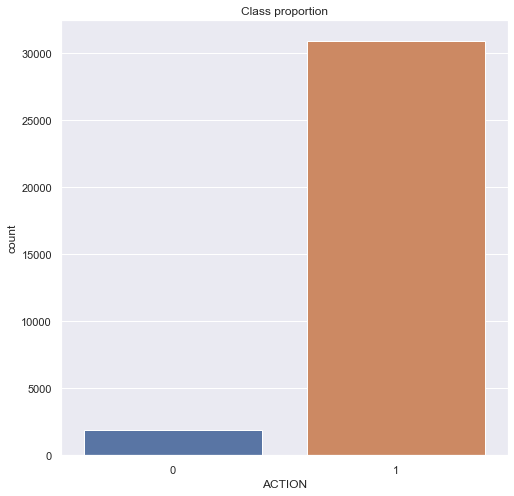

In [578]:
sns.set(rc={'figure.figsize':(8,8)})
plt.title("Class proportion")
sns.countplot(data=train,x='ACTION')

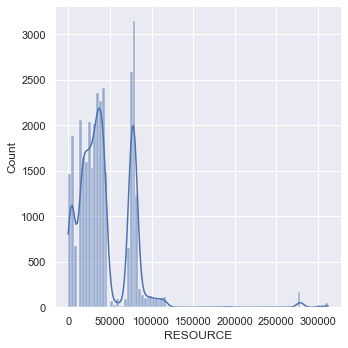

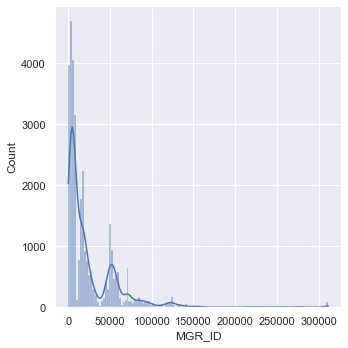

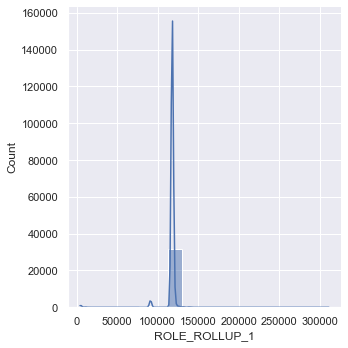

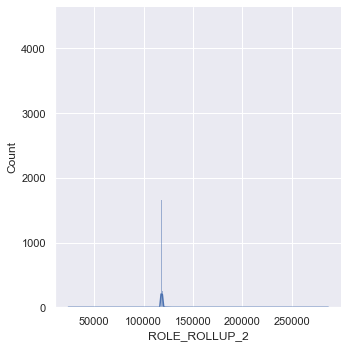

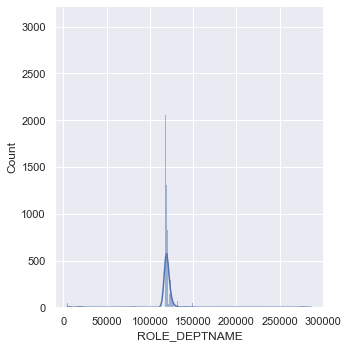

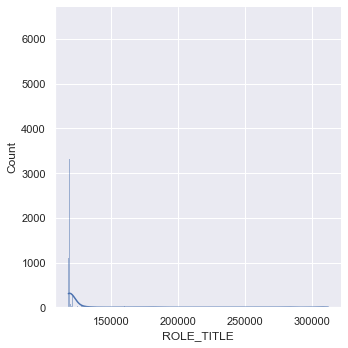

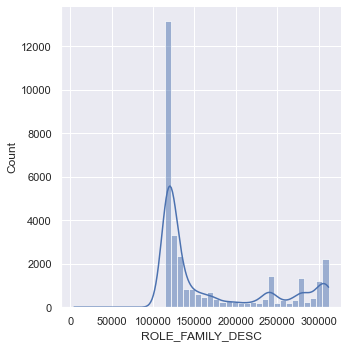

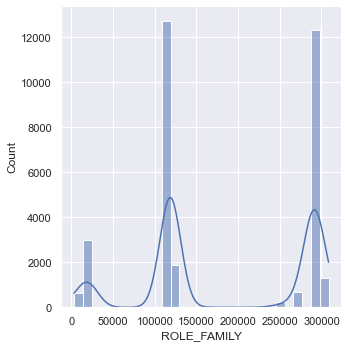

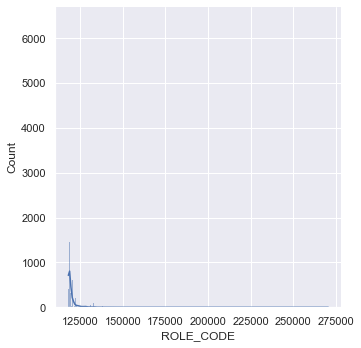

In [579]:
## Distribution Chart for all input features 
for i in train.columns:
    if i!='ACTION':
        sns.displot(data=train[i],kde=True)

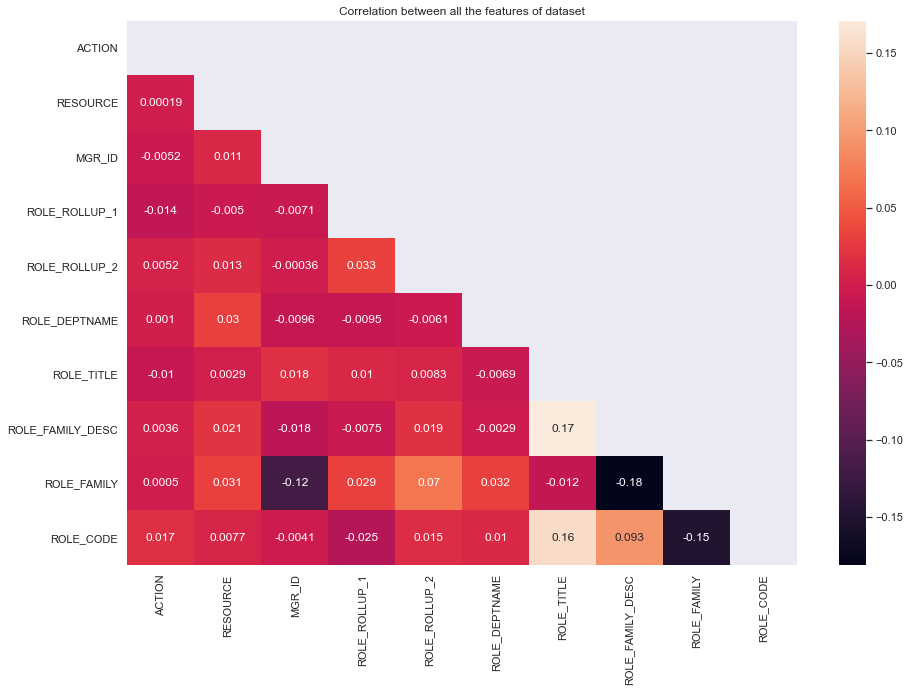

In [580]:
#Checking for multicolinearity in the dataset
corr=train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Correlation between all the features of dataset")
sns.heatmap(corr,mask=mask,annot=True);

In [581]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [582]:
def model(X_train, y_train, X_test, y_test, weights):
    model = keras.Sequential([
        keras.layers.Dense(9, input_dim=9, activation='relu'),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="softmax")
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=300,class_weight = {0:1, 1:1})
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred

In [583]:
X=train.drop(['ACTION'],axis=1)
y=train['ACTION']

In [584]:

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, stratify=y,shuffle=True)

In [585]:
y_train1.value_counts()

1    24697
0     1518
Name: ACTION, dtype: int64

In [586]:
y_test1.value_counts()

1    6175
0     379
Name: ACTION, dtype: int64

In [587]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

X_train1 = sc.fit_transform(X_train1)

In [588]:
# Compute class weight to handle imbalance issue

n_samples = len(y_train1)
n_classes = 2
class_count =  np.bincount(y_train1)
print("Count of each class is :",class_count)

# Below formula is used for class weight
class_weight = n_samples / (n_classes * np.bincount(y_train1))

class_weight = {0: class_weight[0], 1: class_weight[1]}
print("Weight assigned using formula:", class_weight)


Count of each class is : [ 1518 24697]
Weight assigned using formula: {0: 8.63471673254282, 1: 0.5307324776288618}


In [589]:
X_test1=sc.transform(X_test1)

In [590]:
y_pred1 = model(X_train1, y_train1, X_test1, y_test1,  class_weight)

Epoch 1/10
820/820 [==============================] - 3s 3ms/step - loss: 0.6916 - accuracy: 0.9421
Epoch 2/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.9421
Epoch 3/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6832 - accuracy: 0.9421
Epoch 4/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6804 - accuracy: 0.9421
Epoch 5/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6804 - accuracy: 0.9421
Epoch 6/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6786 - accuracy: 0.9421
Epoch 7/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6782 - accuracy: 0.9421
Epoch 8/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6779 - accuracy: 0.9421
Epoch 9/10
820/820 [==============================] - 2s 3ms/step - loss: 0.6769 - accuracy: 0.9421
Epoch 10/10
205/205 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.9422

C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [591]:
from collections import Counter

In [592]:
## Model2 Using imblearn package to create balanced dataset

In [593]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.10,shuffle=False)

In [594]:
from imblearn.over_sampling import SMOTE

counter=Counter(y_train)
print("Before Oversampling: ",counter)


Before Oversampling:  Counter({0: 1693})


In [595]:
sm=SMOTE()
X_train_os, y_train_os =sm.fit_resample(X_train2,y_train2)
counter=Counter(y_train_os)
print("After Oversampling: ",counter)

After Oversampling:  Counter({1: 27781, 0: 27781})


In [596]:
sc = MinMaxScaler(feature_range=(0, 1))
X_train_os = sc.fit_transform(X_train_os)
X_test_os = sc.transform(X_test)

In [597]:
y_pred2 = model(X_train_os, y_train_os, X_test2, y_test2, -1)

Epoch 1/300
1737/1737 [==============================] - 6s 3ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 2/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6766 - accuracy: 0.5000
Epoch 3/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6714 - accuracy: 0.5000
Epoch 4/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6673 - accuracy: 0.5000
Epoch 5/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6633 - accuracy: 0.5000
Epoch 6/300
1737/1737 [==============================] - 4s 3ms/step - loss: 0.6605 - accuracy: 0.5000
Epoch 7/300
1737/1737 [==============================] - 4s 3ms/step - loss: 0.6584 - accuracy: 0.5000
Epoch 8/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6565 - accuracy: 0.5000
Epoch 9/300
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6555 - accuracy: 0.5000
Epoch 10/300
1737/1737 [==============================] - 5s 3ms/step - l

C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r